# Trabalho de Sistemas Lineares I

## Grupo 2 - Diogo Lima, Karinna Caiaffa, Leandro Assis e Raiane Marinho

In [395]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
# Importação de bibliotecas para desenvolvimento dos cálculos (sympy e numpy) e plotagem dos gráficos (matplotlib)

In [377]:
sp.init_printing()
plt.rcParams['figure.figsize'] = 10, 10            # Define o tamanho dos gráficos
plt.rcParams['legend.fontsize'] = 14               # Define o tamanho da fonte da legenda
plt.rcParams['lines.linewidth'] = 2                # Define a espessura dos gráficos
plt.rcParams['axes.grid'] = False                  # Desabilita a quadriculação dos gráficos

t = sp.symbols('t', real=True)                     # Define a variável t 
s = sp.symbols('s', real=False)                    # Define a variável de La Place s
j = sp.I*1                                         # Define j como complexo, ao invés de i 
omega, beta = sp.symbols('omega, beta', real=True) # Define ω e β
mod, fase = sp.symbols('M, teta', real=True)       # Define variáveis para módulo e fase
degrau = sp.Heaviside(t)                           # Define a função degrau unitário u(t)

# Configuração da saída visual e criação das variáveis empregadas ao longo do trabalho

In [378]:
def LaPlace(funcao): # Função de cálculo da transformada de laPlace
    return sp.laplace_transform(funcao, t, s, noconds=True)

def InversaLaPlace(Funcao): #Função de cálculo da inversa de LaPlace
    return sp.inverse_laplace_transform(Funcao, s, t, noconds=True)

def Fourier(funcao): # Função de cálculo da transformada de LaPlace
    s = I*omega
    return sp.laplace_transform(funcao, t, s, noconds=True)

def SeriedeFourier(funcao, t_0, t_f): # Função de cálculo da série de fourier
    return sp.fourier_series(funcao, (t, t_0, t_f))

def H_s(beta): # Função de transferência do sistema estudado neste trabalho
    return (48+2*beta**2)/(s**2+2*beta*s+(24+beta)**2)

def symplot(F, intervalo, funLabel, xLabel, yLabel, legend=True, multiGraficos=True): # Função para plotar gráficos
    f_num = np.zeros(intervalo.shape)
    for indT in range(0, intervalo.size):
        f_num[indT] = F.evalf(subs={t:intervalo[indT]})

    plt.plot(intervalo, f_num, label=funLabel)
    if legend:
        plt.legend();
    plt.xlim([min(intervalo), max(intervalo)]);
    plt.xlabel(xLabel);
    if not multiGraficos:
        plt.close()
        
def duplot(F1, F2, intervalo, xLabel, yLabel, nome, titulo): # Função para plotar dois gráficos quaisquer
    fig, (funcao1, funcao2) = plt.subplots(2)
    fig.suptitle(titulo)
    
    for loop in range(2):
        if loop == 0: # Iteração para esboçar gráfico de módulo
            f_num = np.zeros(intervalo.shape)
            for indT in range(0, intervalo.size):
                f_num[indT] = F1.evalf(subs={t:intervalo[indT]})
            funcao1.plot(intervalo, f_num, 'tab:green')
            funcao1.set_title(nome[0])
            funcao1.set(xlabel=xLabel, ylabel=yLabel)
        else:
            for indT in range(0, intervalo.size):
                f_num[indT] = F2.evalf(subs={t:intervalo[indT]})
            funcao2.plot(intervalo, f_num, 'tab:purple')
            funcao2.set_title(nome[1])
            funcao2.set(xlabel=xLabel, ylabel=yLabel)
            
def polos(func, simbolo=s): # Função para calcular os pólos de uma função de transferência H(s)
    return sp.solve(func, simbolo)

def analise_linear(b0, a1, a0): # Recebe os valores de b0, a1 e a0 e retorna os valores de wn, α e K
    wn = sp.sqrt(a0)
    alpha = a1/(2*wn)
    K = b0/a0
    if 0 < alpha and alpha < 1:
        wn = wn*sp.sqrt(1-alpha**2)
    return wn, alpha, K

def Modulo(numerador, denominador, diagramaBode=True): # Função para calcular o módulo de uma resposta em frequência H(jω)
    if diagramaBode:
        return 20*sp.log(sp.sqrt(sp.re(numerador)**2+ sp.im(numerador)**2)) - 20*sp.log(sp.sqrt(sp.re(denominador)**2+ sp.im(denominador)**2))
    return sp.sqrt(sp.re(numerador)**2+ sp.im(numerador)**2)/sp.sqrt(sp.re(denominador)**2+ sp.im(denominador)**2)
    
def Fase(numerador, denominador): # Função para calcular a fase de uma resposta em frequência H(jω)
    return (180/sp.pi)*(sp.atan(sp.im(numerador)/sp.re(numerador)) - sp.atan(sp.im(denominador)/sp.re(denominador)))

def DiagramaDeBode(funcaoModulo, funcaoFase, intervalo, titulo): # Função que plota os gráficos de módulo e fase de uma função
    fig, (Gmodulo, Gfase) = plt.subplots(2)
    fig.suptitle(titulo)
    
    for loop in range(2):
        if loop == 0: # Iteração para esboçar gráfico de módulo
            f_num = np.zeros(intervalo.shape)
            for indW in range(0, intervalo.size):
                f_num[indW] = funcaoModulo.evalf(subs={omega:intervalo[indW]})
            Gmodulo.plot(intervalo, f_num, 'tab:red')
            Gmodulo.set_title('Diagrama de módulo')
            Gmodulo.set(xlabel='Frequência (ω)', ylabel='Módulo, dB')
        else:
            for indW in range(0, intervalo.size):
                f_num[indW] = funcaoFase.evalf(subs={omega:intervalo[indW]})
            Gfase.plot(intervalo, f_num, 'tab:blue')
            Gfase.set_title('Diagrama de fase')
            Gfase.set(xlabel='Frequência (ω)', ylabel='Graus, θ')
        
# Definição das funções úteis ao longo do trabalho

### Questão 1)

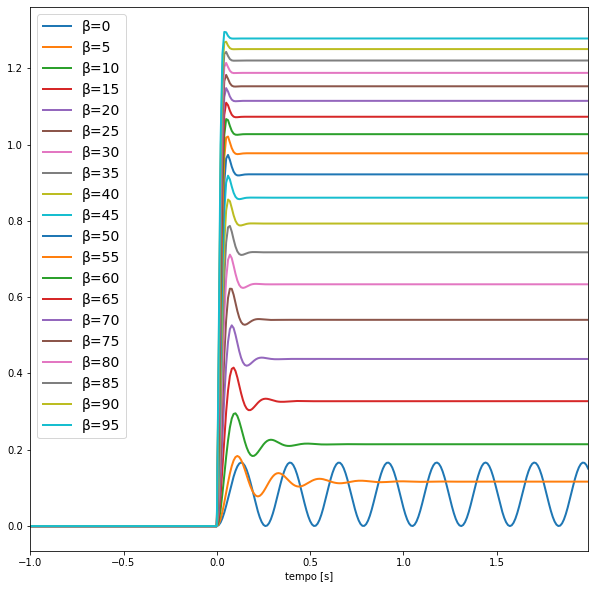

In [197]:
for beta in range(0,100,5): 
    y_f = InversaLaPlace(H_s(beta)*LaPlace(degrau)) # Cálculo da resposta ao estado zero para diferentes valores de β
    intervalo = np.arange(-1, 2, 0.01) # Criação do intervalo de tempo para o qual as funções y_f(t) serão plotadas
    symplot(y_f, intervalo, 'β='+str(beta), 'tempo [s]', 'y_f(t)') # Plotagem das funções com diferentes β
    

Plotando as resposta ao estado zero para valores de β de 0 à 100 com intervalo de 5 unidades, obtém-se os gráficos acima. Como é possível notar, para valores de β maiores que zero tem-se um sistema subamortecido que tende à estabilidade mais rapidamente conforme β cresce.

Como deve-se escolher apenas 3 valores de β que provoquem diferenças no gráfico produzido, escolhe-se, para seguir com o trabalho, os valores 0, 2 e 65. Fez-se essa escolha pois em β igual a 0 o gráfico y(t) se torna um sinal periódico, em β igual a 2 tem-se uma forte característica subamortecida na saída do sistema, e em β igual a 65 observa-se a característica subamortecida com tempo de decaimento curtíssimo.

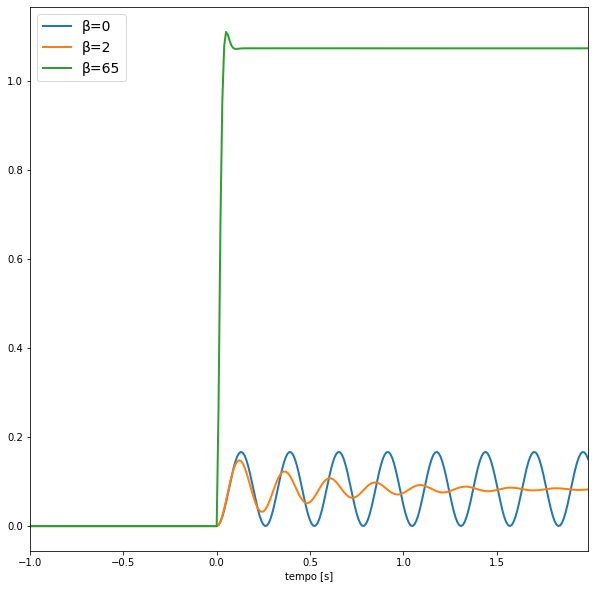

In [198]:
for beta in [0,2,65]:
    y_f = InversaLaPlace(H_s(beta)*LaPlace(degrau))
    intervalo = np.arange(-1, 2, 0.01)
    symplot(y_f, intervalo, 'β='+str(beta), 'tempo [s]', 'y_f(t)')

O gráfico acima apresenta a resposta à um degrau unitário do sistema com os 3 valores de β escolhidos.

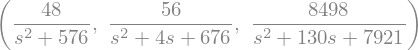

In [199]:
# Primeira linha - Apresentação dos operadores de transferência avaliados nos valores de β escolhidos
H_s(0), H_s(2), H_s(65)

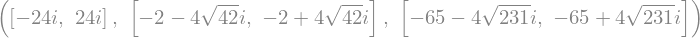

In [204]:
# Segunda linha - Cálculo dos pólos de cada operador de transferência acima
polos(H_s(0).as_numer_denom()[1]), polos(H_s(2).as_numer_denom()[1]), polos(H_s(65).as_numer_denom()[1])

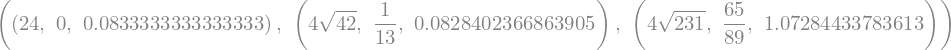

In [205]:
# Terceira linha - Análise de ωn, α e K (na ordem) para cada β em 0, 2 e 65, respectivamente
analise_linear(48, 0, 576), analise_linear(56, 4, 676), analise_linear(8498, 130, 7921)

Com o resultado das funções executadas acima, pode-se comentar sobre os gráficos apresentados acima.

No gráfico de β = 0, temos $H(s) = \frac{48}{s^2+576}$. Essa função de transferência possui pólos puramente complexos iguais a $\pm 24j$ (como obtido na segunda linha após o gráfico). Devido a esses pólos puramente complexos, temos como resposta um modo natural de regime permanente (α = 0 obtido na terceira linha após o gráfico), com frequência de oscilação (frequência natural não amortecida) proporcional ao valor da parte imaginária dos pólos (ωn = 24 obtido na terceira linha após o gráfico). É interessante observar que o valor de K = 0.0833, valor para o qual a saída tenderia após um tempo t caso fosse amortecida, é o valor "médio" do sinal periódico, valor ao redor do qual o sinal varia à frequência ωn.

No gráfico de β = 2, temos $H(s) = \frac{56}{s^2+4s+676}$. Essa função de transferência possui pólos localizados no SPLE (semiplano lateral esquerdo) iguais a $-2 \pm j4\sqrt{42}$. Por os pólos não estarem mais unicamente sobre o eixo dos complexos, mas sim a esquerda do mesmo, a resposta tende a ser uma oscilação amortecida com o tempo. Apresentando coeficiente de amortecimento igual a $\approx 0.077$ (α = $\dfrac{1}{13}$) e frequência natural amortecida igual a 26 (ωn = 26).
É interessante observar que por conta da parte imaginária ser maior, em módulo, para β = 2 do que para β = 0, a resposta tem uma frequência de oscilação superior a anterior. Como esperado por conta do valor de K = 0.0828, temos o valor da resposta convergindo para K após um tempo suficientemente grande.

Já no gráfico de β = 65, temos $H(s) = \frac{8498}{s^2+130s+7921}$. Essa função de transferência, assim como para β = 2, representa uma resposta amortecida ao degrau unitário . Como é possível observar na linha 2 após o gráfico, os pólos possuem partes real e imaginária bem maiores (em módulo) do que as funções de transferências para os outros valores de β. Por conta disso observa-se um aumento nas características analisadas em β = 2, ou seja, o coeficiente de amortecimento aumenta em aproximadamente 10 vezes, e a frequência de oscilação (frequência natural amortecida neste caso) aumenta em aproximadamente 3.45 vezes. É interessante observar o aumento na amplificação ao degrau (K) para este valor de β, sendo aproximadamente 13 vezes o obtido em β = 2.

### Questão 2)

In [330]:
# Printa as três expressões da resposta em frequência H(jω) para os valores de β
H_jw = []
for beta in [0,2,65]:
    s = j*omega # Define s = 0 + jω 
    H_jw.append(H_s(beta)) # Calcula o valor da resposta em frequência H(jω) para cada valor escolhido para β

Para β = 0 tem-se:
$$H(jω) = \frac{48}{576-ω^2}$$
$$|H(jω)| = -20\log{(-ω^2+576)} + 20\log{(48)}$$
$$\Theta{(H(jω))} = 0$$

Para β = 2 tem-se:
$$H(jω) = \frac{56}{-ω^2+ 4jω + 676}$$
$$|H(jω)| = -20\log{(\sqrt{16ω^2+ (676-ω^2)^2})} + 20\log{(56)}$$
$$\Theta{(H(jω))} = -\arctan{\frac{4ω}{676-ω^2}}$$

Para β = 65 tem-se:
$$H(jω) = \frac{8498}{-ω^2+ 130jω + 7921}$$
$$|H(jω)| = -20\log{(\sqrt{16900ω^2+ (7921-ω^2)^2})} + 20\log{(8498)}$$
$$\Theta{(H(jω))} = -\arctan{\frac{130ω}{7921 - ω^2}}$$

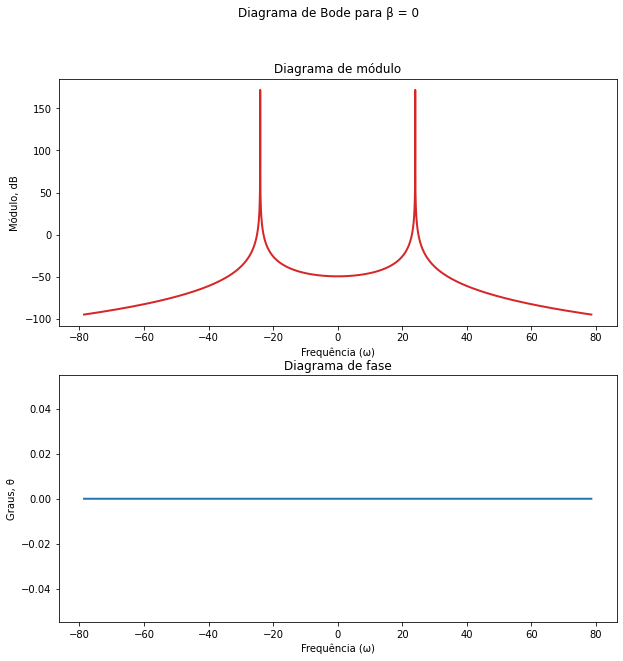

In [331]:
# Diagrama de Bode para β = 0
DiagramaDeBode(Modulo(H_jw[0].as_numer_denom()[0], H_jw[0].as_numer_denom()[1]), Fase(H_jw[0].as_numer_denom()[0], H_jw[0].as_numer_denom()[1]), np.arange(-25*sp.pi, 25*sp.pi, 0.01), 'Diagrama de Bode para β = 0')

No Diagrama de Bode acima, calculado sobre β = 0, é interessante notar que não há desvio angular para nenhuma frequência. Isso acontece pois o pólo da função de transferência é puramente complexo, não resultando em parte imaginária na função de resposta em frequência. Ou seja, resultando na expressão $\arctan(\frac{0}{48}) - \arctan(\frac{0}{576-ω^2}) = 0  \forall  ω$.

Em relação ao diagrama de módulo, podemos observar a amplitude altíssima do pico de ressonância onde $ω = ω_{n} = 24$. Esse pico é na verdade uma assíntota vertical neste valor da frequência natural não amortecida.

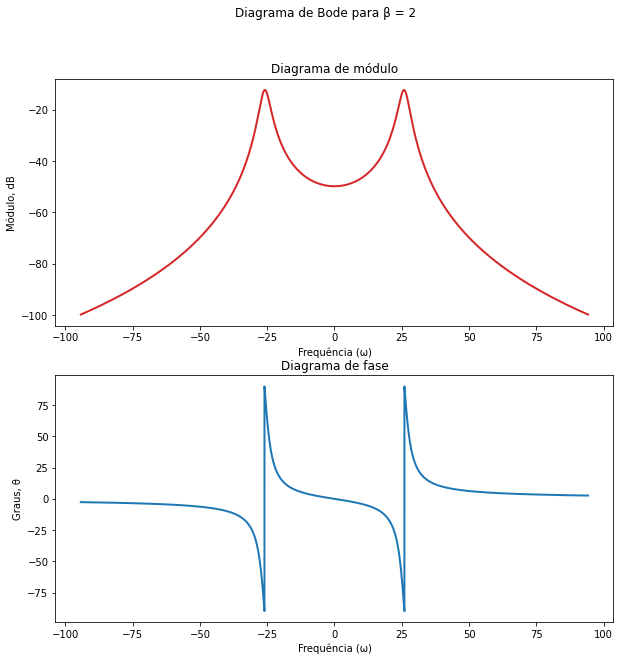

In [332]:
# Diagrama de Bode para β igual a 2
DiagramaDeBode(Modulo(H_jw[1].as_numer_denom()[0], H_jw[1].as_numer_denom()[1]), Fase(H_jw[1].as_numer_denom()[0], H_jw[1].as_numer_denom()[1]), np.arange(-30*sp.pi, 30*sp.pi, 0.01),'Diagrama de Bode para β = 2')

Neste Diagrama de Bode, pode-se observar um comportamento similar ao primeiro no diagrama de módulo. A diferença principal está na mudança de um assíntota vertical para uma curva mais suave na frequência de ressonância. Essa suavização está relacionada ao pólo não ser mais puramente complexo, ou seja, possui um valor de coeficiente de amortecimento.

No diagrama de fase é possível obversar que na frequência de ressonância tem-se uma assíntota vertical (que na realidade se limita em $\pm 180º$). Ao se aproximar da frequência $ω_{n}$, tem-se uma suavização relativamente baixa (mas não nula) proporcional ao valor de α que, por conta do pólo da função de transferência em β = 2 possuir componente real muito inferior à componente imaginária, é um valor relativamente pequeno.

O desvio de fase tende a 0º para valores de ω << $ω_{n}$ ou ω >> $w_{n}.$

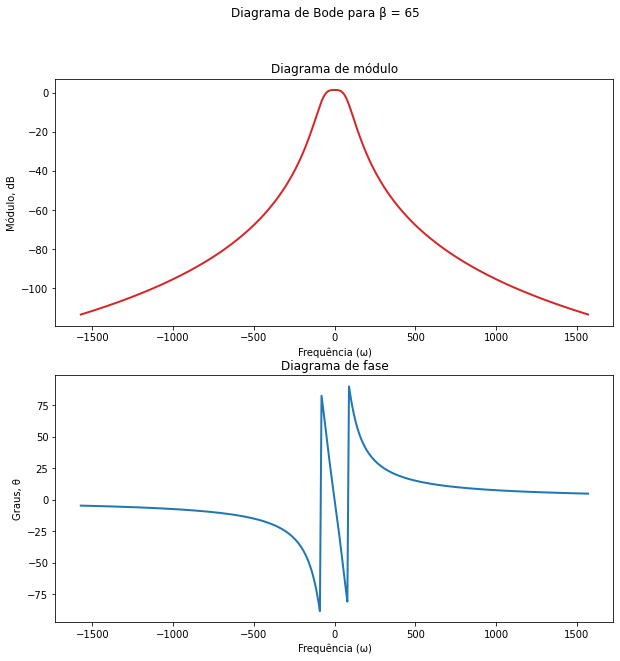

In [336]:
# Diagrama de Bode para β igual a 65
DiagramaDeBode(Modulo(H_jw[2].as_numer_denom()[0], H_jw[2].as_numer_denom()[1]), Fase(H_jw[2].as_numer_denom()[0], H_jw[2].as_numer_denom()[1]), np.arange(-500*sp.pi, 500*sp.pi, 10), 'Diagrama de Bode para β = 65')

Assim como no Diagrama de Bode anterior, para β = 65 há um suavização no pico de ressonância. Essa suavização notável está diretamente associada ao valor de α que é 10 vezes maior que para β = 2.

É notável a variação linear (por conta da alta suavização) do desvio de fase variando de 0º até -180º. Após isso, sobe assintoticamente para 180º e volta a descer de forma suave e exponencial até 0º.

Para os diferentes valores de β apresentados nos gráficos foi possível observar a diferença de módulo para os mesmos valores de frequência. Essa diferença (em β = 0 e β = 2 os valores são menores que 0 em praticamente todo ω e em β = 65 é maior que 0 até ω $\approx$ 55) está relacionada com o ganho provocado pela constante no numerador da função de transferência. Para β = 0, por exemplo, já para ω = 0 tem-se o módulo resultando em um diminuição de amplitude.

### Questão 3)

In [521]:
# f_entrada = sen(ωt)
beta = 80 # Escolhe-se o valor de β = 80 arbitrariamente
y_rp = []
desvios, ganhos = [], []
for omega in [50, 200, 800]: # Valor de frequência escolhidos com análise de várias simulações 
    s = j*omega
    mod = Modulo(H_s(beta).as_numer_denom()[0], H_s(beta).as_numer_denom()[1], False)
    fase = Fase(H_s(beta).as_numer_denom()[0], H_s(beta).as_numer_denom()[1])
    desvios.append(fase)
    ganhos.append(mod)
    y_rp.append(mod*sp.sin(omega*t + fase)) # Salva o valor de y_rp = mod*sen(ωt + θ)
    
# Criação de uma matriz com as equações de y_rp para cada frequência escolhida

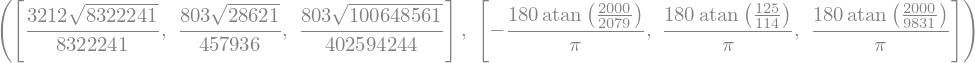

In [318]:
# Apresentação dos desvios angulares para cada frequência
ganhos, desvios

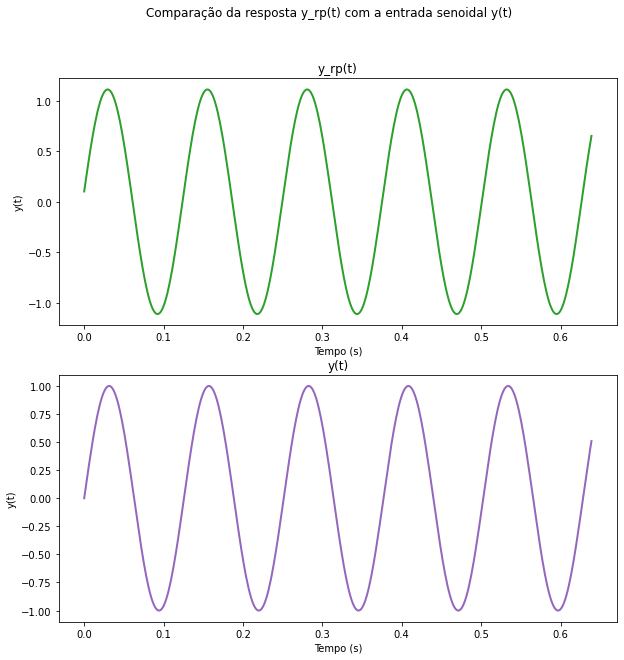

In [319]:
intervalo = np.arange(0, 0.64, 0.0015)
duplot(y_rp[0], sp.sin(50*t) , intervalo, 'Tempo (s)', 'y(t)', ['y_rp(t)','y(t)'],'Comparação da resposta y_rp(t) com a entrada senoidal y(t)')
# Plota a comparação de y_rp(t) e y(t) para ω = 50

Para a frequência ω = 50 nota-se a resposta em regime permanente com ganho de amplitude pouco superior a 1.1 vezes, e atraso angular de aproximadamente 44º.

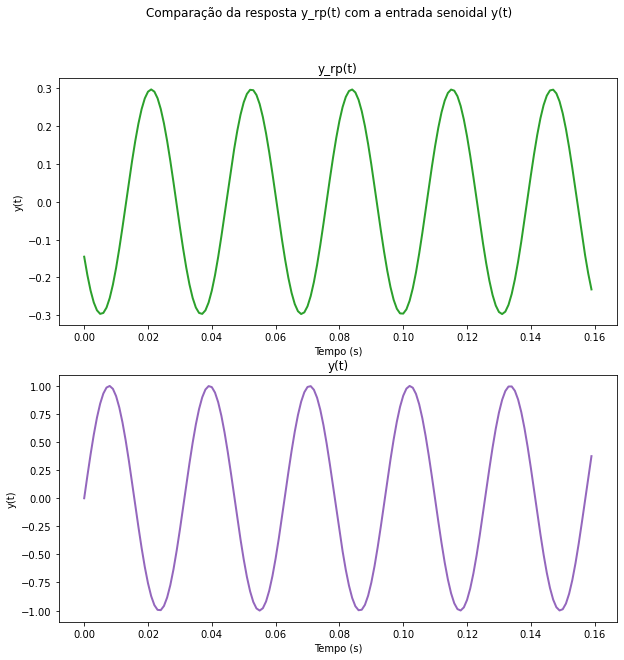

In [320]:
intervalo = np.arange(0, 0.16, 0.001)
duplot(y_rp[1], sp.sin(200*t), intervalo, 'Tempo (s)', 'y(t)', ['y_rp(t)','y(t)'],'Comparação da resposta y_rp(t) com a entrada senoidal y(t)')
# Plota a comparação de y_rp(t) e y(t) para ω = 200

Para a frequência ω = 200 nota-se a resposta em regime permanente com ganho de amplitude de 0.3 vezes, e adiantamento angular de aproximadamente 48º.

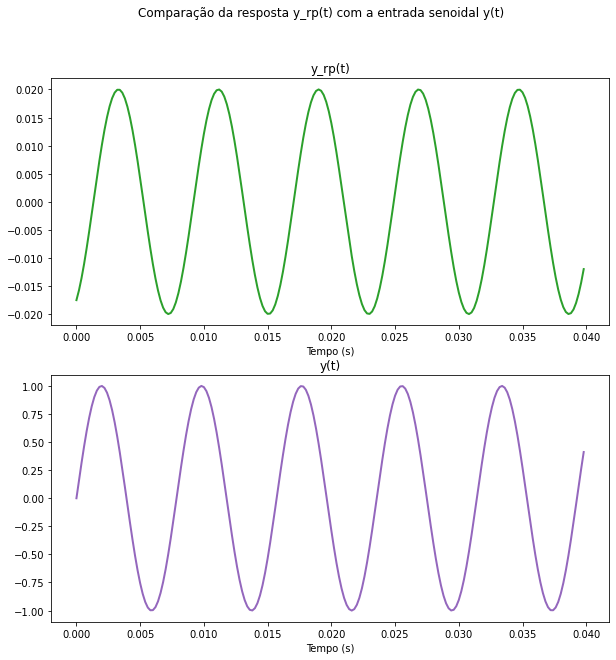

In [321]:
intervalo = np.arange(0, 0.04, 0.0002)
duplot(y_rp[2], sp.sin(800*t), intervalo, 'Tempo (s)', '', ['y_rp(t)','y(t)'],'Comparação da resposta y_rp(t) com a entrada senoidal y(t)')
# Plota a comparação de y_rp(t) e y(t) para ω = 800

Para a frequência ω = 800 nota-se a resposta em regime permanente com ganho de amplitude de 0.02 vezes, e adiantamento angular de aproximadamente 11.5º.

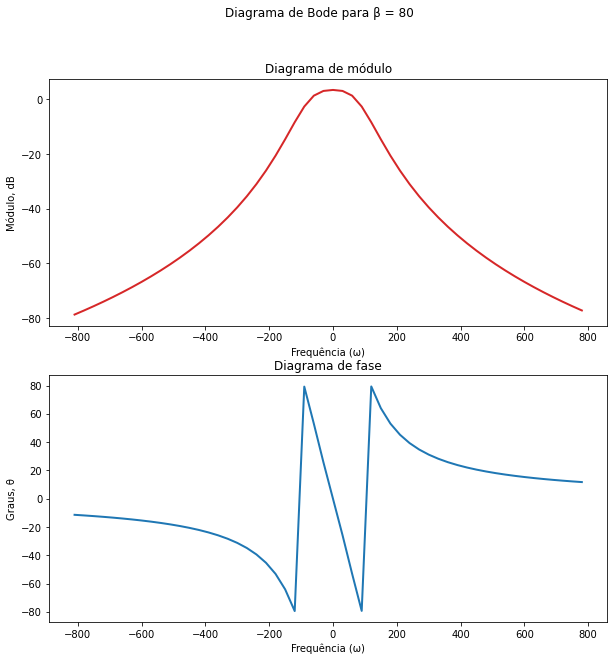

In [523]:
omega = sp.symbols('omega')
s =  j*omega
DiagramaDeBode(Modulo(H_s(80).as_numer_denom()[0], H_s(80).as_numer_denom()[1]), Fase(H_s(80).as_numer_denom()[0], H_s(80).as_numer_denom()[1]), np.arange(-810, 810, 30), 'Diagrama de Bode para β = 80')

Como forma de explicar mais facilmente o fenômeno que ocorre sobre os sinais em diferentes frequências, esboça-se o Diagrama de Bode da resposta em frequência H(jω) avaliada em β = 80.

Observando o diagrama de módulo observa-se uma amplificação para frequências muito pequenas (inferiores a aproximadamente 60 rad/s). Para valores de frequência mais altos há uma grande perda de amplitude que aumenta proporcionalmente a ω.

Analisando o diagrama de fase percebe-se que há um atraso para baixas frequência que tende a -180º quando se aproxima suficientemente da frequência de ressonância. Para valores de frequência maiores do que a frequência de ressonância há um adiantamento de fase que decai lentamente de forma exponencial até não haver deslocamento de fase.

### Questão 4)

In [517]:
mod, fase = sp.symbols('M ,teta', real=True)

sinal_periodico = sp.Abs(5*sp.sin(60*sp.pi*t)) # Função |5sen(60πt)| com periodo 1/60 unid. e ω0=2π/60
somas_truncadas = []
for n_termos in [2, 5]:
    somas_truncadas.append(SeriedeFourier(sinal_periodico, 0, 1/60).truncate(n_termos))
# Calcula os valores da serie de Fourier com 2 e 4 termos

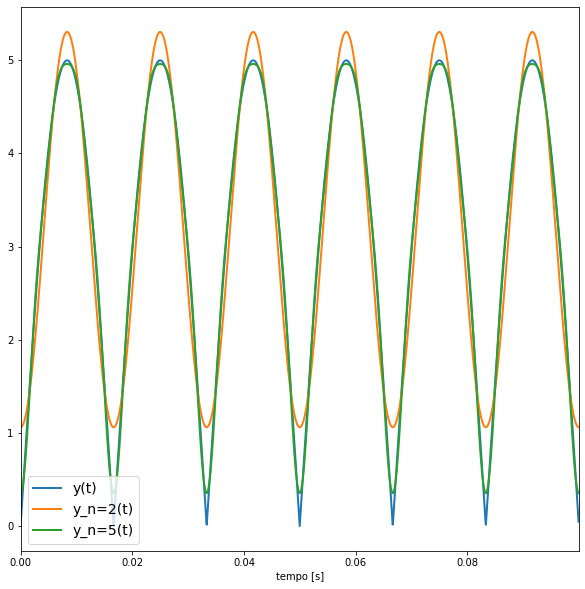

In [518]:
intervalo = np.arange(0, 0.1, 0.00005)
symplot(sinal_periodico, intervalo, 'y(t)', 'tempo [s]', 'y(t)')
symplot(somas_truncadas[0], intervalo, 'y_n=2(t)', 'tempo [s]', 'y(t)')
symplot(somas_truncadas[1], intervalo, 'y_n=5(t)', 'tempo [s]', 'y(t)')

Para o sinal periódico de entrada escolhido não foi necessário um número muito alto de harmônicos para obter um sinal praticamente idêntico ao sinal periódico original.

Com 2 termos da série de Fourier (constante e harmônico fundamental) obtém-se o gráfico em laranja, que aproxima com certos erros a forma da onda original. Com 5 termos da série de Fourier já e possível obter um sinal praticamente idêntico ao sinal original.

In [513]:
# Resposta do sistema com β = 80
s = sp.symbols('s', real= True)
ganho, desvio = [], []
for n in range(0,5):
    omega = n*2*sp.pi/60
    s = j*omega 
    Hs = H_s(80) # Resposta em frequência H(jw)

    ganho.append(Modulo(Hs.as_numer_denom()[0], Hs.as_numer_denom()[1], False))
    desvio.append(Fase(Hs.as_numer_denom()[0], Hs.as_numer_denom()[1])) # Calcula a fase e modulo para a frequência do sinal de entrada

y_n2 = ((-60/9)*ganho[1]*sp.cos(120*sp.pi*t+desvio[1]))/sp.pi + 10*ganho[0]/sp.pi
y_n5 = y_n2 + ((-12/9)*ganho[2]*sp.cos(240*sp.pi*t+desvio[2]))/sp.pi - (0.571418571428572*ganho[3]*sp.cos(360*sp.pi*t+desvio[3]))/sp.pi - (0.317460317460317*ganho[4]*sp.cos(480*sp.pi*t+desvio[4]))/sp.pi

omega = 2*sp.pi/60
mod = Modulo(Hs.as_numer_denom()[0], Hs.as_numer_denom()[1], False)
fase = Fase(Hs.as_numer_denom()[0], Hs.as_numer_denom()[1])
y_t = sp.Abs(mod*5*sp.sin(60*sp.pi*t+fase))

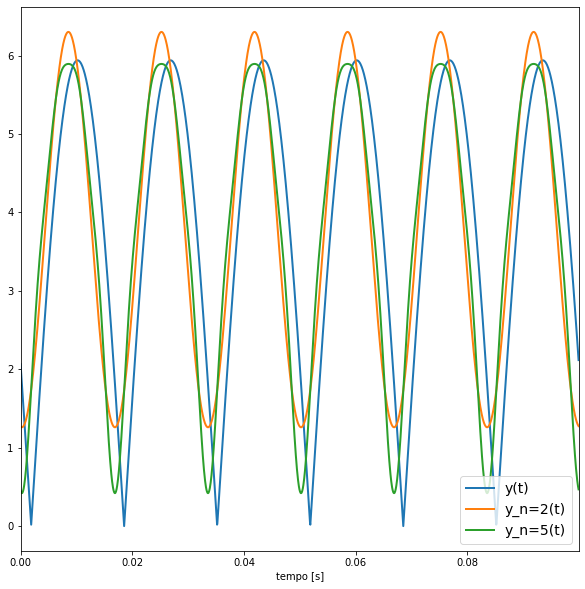

In [514]:
symplot(y_t, intervalo, 'y(t)', 'tempo [s]', 'y(t)')
symplot(y_n2, intervalo, 'y_n=2(t)', 'tempo [s]', 'y(t)')
symplot(y_n5, intervalo, 'y_n=5(t)', 'tempo [s]', 'y(t)')

Assim como no gráfico anterior, o sinal que mais se aproxima da resposta ao original é a resposta a série de fourier com mais termos. Como apresentado no Diagrama de Bode da questão 3, o módulo da resposta em frequência para ω tende a ficar em valores ínfimos a partir de certo valor. Além disso, como apresentado no diagrama de fase deste mesmo Diagrama de Bode, conforme ω cresce há um atraso de fase considerável, até que para certo valor de ω as fases passam a ser adiantadas e mais a frente, os harmônicos de frequências elevadíssimas quase não possuem desvio angular.

Sabendo disso, e tendo em mente que as séries de Fourier é a soma de sinais periódicos simples com frequências diferentes (e consequentemente amplitudes e desvios angulares distintos), pode-se afirmar que com um número suficientemente grandes de harmônicos o sinal de resposta a uma soma truncada da Série de Fourier aproxima de forma apropriada a resposta ao sinal original.

### Questão 5)

Qualquer sistema físico que possa ser modelado linearmente como um sistema de segunda ordem apresenta uma função de  transferência similar àquela a qual foi feita a análise neste relatório. Para descrever um sistema físico dentro da área de estudo do curso, escolhe-se um circuito RLC em série no qual busca-se analisar uma solução geral que relacione a corrente do circuito para uma entrada de tensão.

A fim de identificar a expressão analítica da corrente em função da entrada de tensão, modela-se o sistema seguindo a Lei de Kirchhoff como descrito abaixo:

$$V_{L} + V_{R} + V_{C} = V_{fonte}$$

Como é de conhecimento geral, podemos substituir os valores da seguinte forma:

$$\dfrac{dV_{R}}{dt} = R\times \dfrac{di}{dt}$$
$$\dfrac{dV_{L}}{dt} = L\times \dfrac{d^2i2}{dt^2}$$
$$\dfrac{dV_{C}}{dt} = \frac{1}{C}\times i \therefore i = C \times \dfrac{dV_{C}}{dt}$$
$$V_{C} = \frac{1}{C}\times \int_{0}^{t}i \,dt$$

Com essas substituições temos a expressão analítica, dividindo ambos os lados por L:

$$\dfrac{d^2i}{dt^2} + \frac{R}{L}\times \dfrac{di}{dt} + \frac{i}{LC} = \frac{1}{L}\dfrac{dV_{fonte}}{dt}$$

Ou seja, esse sistema linear possui função de transferência relacionando $V_{fonte}(t)$ e $i(t)$ igual a:

$$H(s) = \frac{\frac{1}{L}}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

Comparando a função de transferência obtida com a apresentada para este trabalho, pode-se chegar as seguintes relações entre os valores de R, L, C e $\beta$:

$$L = \frac{1}{2\beta^2+48}$$

$$R = \frac{\beta}{\beta^2+24}$$

$$C = 2$$

O componente que influencia no valor de $\beta$ é o resistor. Através da alteração do valor do mesmo, a resposta do sistema poderá operar em regime super-crítico, crítico ou sub-crítico.


### Conclusão

O valor de $\beta$ interfere nos valores do coeficiente de amortecimento, assim como nas frequências naturais não amortecida e amortecida (a depender do valor do coeficiente de amortecimento). Mais precisamente, o valor de $\beta$ é o que determina a taxa de decaimento e a frequência da oscilação.
